In [ ]:
from keras.datasets import cifar100
(X_train,y_train),(X_test,y_test)= cifar100.load_data()

169017344/169001437 [==============================] - 13s 0us/step


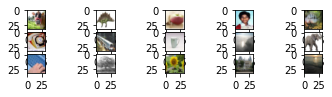

In [ ]:
import matplotlib.pyplot as plt
n= 10
for i in range(15):
  plt.subplot(n,5,i+1)
  plt.imshow(X_train[i])
plt.show()

In [ ]:
import tensorflow as tf 
x_leftright = []
y_leftright  = []
for i in range(X_train.shape[0]):
  x = tf.image.flip_left_right(X_train[i])
  y = y_train[i]
  x_leftright.append(x)
  y_leftright.append(y)

In [ ]:
import numpy as np
x_leftright = np.array(x_leftright)
y_leftright = np.array(y_leftright)

In [ ]:
import tensorflow as tf 
x_updown = []
y_updown  = []
for i in range(X_train.shape[0]):
  x = tf.image.flip_up_down(X_train[i])
  y = y_train[i]
  x_updown.append(x)
  y_updown.append(y)

In [ ]:
x_updown = np.array(x_updown)
y_updown = np.array(y_updown)

In [ ]:
x_train = np.concatenate((X_train,x_leftright,x_updown))
Y_train = np.concatenate((y_train,y_leftright,y_updown))

In [ ]:
from keras.layers import Activation
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D,BatchNormalization
from tensorflow.keras.utils import to_categorical
from keras import backend as K
from keras.layers import Activation
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras import backend as K

In [ ]:
x_train = x_train.reshape(x_train.shape[0], 32, 32, 3)
X_test = X_test.reshape(X_test.shape[0], 32, 32, 3)
Y_train = to_categorical(Y_train, 100)
y_test = to_categorical(y_test, 100)
x_train = x_train.astype('float32')
X_test = X_test.astype('float32')
x_train /= 255
X_test /= 255
print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'train samples')
print(X_test.shape[0], 'test samples')

x_train shape: (150000, 32, 32, 3)
150000 train samples
10000 test samples


In [ ]:
model= Sequential()
model.add(Conv2D(32,(3,3),activation='relu',kernel_initializer='he_uniform',padding='same',input_shape=(32,32,3)))
model.add(Conv2D(32,(3,3),activation='relu',kernel_initializer='he_uniform',padding='same'))
model.add(MaxPooling2D((2,2)))

model.add(Conv2D(64,(3,3),activation='relu',kernel_initializer='he_uniform',padding='same'))
model.add(Conv2D(64,(3,3),activation='relu',kernel_initializer='he_uniform',padding='same'))
model.add(MaxPooling2D((2,2)))

model.add(Conv2D(128,(3,3),activation='relu',kernel_initializer='he_uniform',padding='same'))
model.add(MaxPooling2D((2,2)))

model.add(Flatten())
model.add(Dense(128,activation='relu',kernel_initializer='he_uniform'))
model.add(Dense(100,activation='softmax'))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 32, 32, 32)        896       
                                                                 
 conv2d_1 (Conv2D)           (None, 32, 32, 32)        9248      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 16, 16, 32)       0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 16, 16, 64)        18496     
                                                                 
 conv2d_3 (Conv2D)           (None, 16, 16, 64)        36928     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 8, 8, 64)         0         
 2D)                                                    

In [ ]:
from keras.backend import categorical_crossentropy
from tensorflow.keras.optimizers import Adam,SGD

#opt= SGD(lr=0.01,momentum=0.9)

opt =Adam()
model.compile(opt,loss='categorical_crossentropy',metrics=['accuracy'])
hist = model.fit(x_train, Y_train,batch_size=64,epochs=50,verbose=1,validation_data=(X_test, y_test))

model.save('cifar100.h5')

Epoch 1/50
2344/2344 [==============================] - 20s 8ms/step - loss: 0.9080 - accuracy: 0.7192 - val_loss: 3.1155 - val_accuracy: 0.4299
Epoch 2/50
2344/2344 [==============================] - 18s 8ms/step - loss: 0.9078 - accuracy: 0.7190 - val_loss: 3.1100 - val_accuracy: 0.4291
Epoch 3/50
2344/2344 [==============================] - 19s 8ms/step - loss: 0.9137 - accuracy: 0.7185 - val_loss: 2.9400 - val_accuracy: 0.4442
Epoch 4/50
2344/2344 [==============================] - 18s 8ms/step - loss: 0.9104 - accuracy: 0.7185 - val_loss: 3.0075 - val_accuracy: 0.4305
Epoch 5/50
2344/2344 [==============================] - 18s 8ms/step - loss: 0.9017 - accuracy: 0.7217 - val_loss: 3.0310 - val_accuracy: 0.4398
Epoch 6/50
2344/2344 [==============================] - 18s 8ms/step - loss: 0.8950 - accuracy: 0.7224 - val_loss: 3.1089 - val_accuracy: 0.4351
Epoch 7/50
2344/2344 [==============================] - 18s 8ms/step - loss: 0.8776 - accuracy: 0.7268 - val_loss: 3.0935 - val_ac

Kết quả dự đoán: lawn_mower


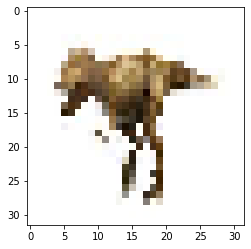

In [ ]:
from numpy import argmax
from keras.saving.save import load_model
model5= load_model('cifar100.h5')

from keras.preprocessing.image import load_img,img_to_array
labels = [
    'apple', 'aquarium_fish', 'baby', 'bear', 'beaver', 'bed', 'bee', 'beetle',
    'bicycle', 'bottle', 'bowl', 'boy', 'bridge', 'bus', 'butterfly', 'camel',
    'can', 'castle', 'caterpillar', 'cattle', 'chair', 'chimpanzee', 'clock',
    'cloud', 'cockroach', 'couch', 'crab', 'crocodile', 'cup', 'dinosaur',
    'dolphin', 'elephant', 'flatfish', 'forest', 'fox', 'girl', 'hamster',
    'house', 'kangaroo', 'keyboard', 'lamp', 'lawn_mower', 'leopard', 'lion',
    'lizard', 'lobster', 'man', 'maple_tree', 'motorcycle', 'mountain', 'mouse',
    'mushroom', 'oak_tree', 'orange', 'orchid', 'otter', 'palm_tree', 'pear',
    'pickup_truck', 'pine_tree', 'plain', 'plate', 'poppy', 'porcupine',
    'possum', 'rabbit', 'raccoon', 'ray', 'road', 'rocket', 'rose',
    'sea', 'seal', 'shark', 'shrew', 'skunk', 'skyscraper', 'snail', 'snake',
    'spider', 'squirrel', 'streetcar', 'sunflower', 'sweet_pepper', 'table',
    'tank', 'telephone', 'television', 'tiger', 'tractor', 'train', 'trout',
    'tulip', 'turtle', 'wardrobe', 'whale', 'willow_tree', 'wolf', 'woman',
    'worm'
        ]
img= load_img('dns.jpg',target_size=(32,32))
plt.imshow(img)
img= img_to_array(img)
img= img.reshape(1,32,32,3)
img= img.astype('float32')
img=img/255
result= model.predict(img)
np.argmax(model5.predict(img),axis=1)
print('Kết quả dự đoán:',labels[np.argmax(result)])

Kết quả dự đoán: shark


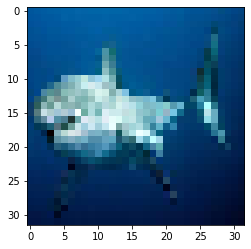

In [ ]:
from numpy import argmax
from keras.saving.save import load_model
model5= load_model('cifar100.h5')
from keras.preprocessing.image import load_img,img_to_array
labels = ['apple', 'aquarium_fish', 'baby', 'bear', 'beaver', 'bed', 'bee', 'beetle',
    'bicycle', 'bottle', 'bowl', 'boy', 'bridge', 'bus', 'butterfly', 'camel',
    'can', 'castle', 'caterpillar', 'cattle', 'chair', 'chimpanzee', 'clock',
    'cloud', 'cockroach', 'couch', 'crab', 'crocodile', 'cup', 'dinosaur',
    'dolphin', 'elephant', 'flatfish', 'forest', 'fox', 'girl', 'hamster',
    'house', 'kangaroo', 'keyboard', 'lamp', 'lawn_mower', 'leopard', 'lion',
    'lizard', 'lobster', 'man', 'maple_tree', 'motorcycle', 'mountain', 'mouse',
    'mushroom', 'oak_tree', 'orange', 'orchid', 'otter', 'palm_tree', 'pear',
    'pickup_truck', 'pine_tree', 'plain', 'plate', 'poppy', 'porcupine',
    'possum', 'rabbit', 'raccoon', 'ray', 'road', 'rocket', 'rose',
    'sea', 'seal', 'shark', 'shrew', 'skunk', 'skyscraper', 'snail', 'snake',
    'spider', 'squirrel', 'streetcar', 'sunflower', 'sweet_pepper', 'table',
    'tank', 'telephone', 'television', 'tiger', 'tractor', 'train', 'trout',
    'tulip', 'turtle', 'wardrobe', 'whale', 'willow_tree', 'wolf', 'woman',
    'worm']
img= load_img('shark2.jpg',target_size=(32,32))
plt.imshow(img)
img= img_to_array(img)
img= img.reshape(1,32,32,3)
img= img.astype('float32')
img=img/255
result= model.predict(img)
np.argmax(model5.predict(img),axis=1)
print('Kết quả dự đoán:',labels[np.argmax(result)])